# $\Large{\color{darkblue}{\textbf{Logistic regression to predict heart disease}}}$

# $\large{\color{darkred}{1.}}$ $\large{\color{darkblue}{\textbf{Importing Libraries}}}$ $\color{red}{✓}$

In [62]:
import pandas as pd
import numpy as np
import seaborn as sbn
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties 
from matplotlib.ticker import AutoMinorLocator
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.preprocessing import StandardScaler

# $\large{\color{darkred}{2.}}$ $\large{\color{darkblue}{\textbf{Reading the data}}}$ $\color{red}{✓}$

In [63]:
Data = pd.read_csv('framingham.csv')
pd.set_option("display.max_columns", 16) # Show all columns of Pandas Dataframe
Data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [64]:
Data.shape

(4238, 16)

# $\large{\color{darkred}{3.}}$ $\large{\color{darkblue}{\textbf{Data Preprocessing}}}$

# ${\color{darkred}{3.1.}}$ ${\color{darkblue}{\textbf{Missing Values Treatment}}}$  $\color{red}{✓}$

In [65]:
Missing_values_percent = 100*(Data.isnull().sum()/len(Data["male"]))
print(Missing_values_percent)

male               0.000000
age                0.000000
education          2.477584
currentSmoker      0.000000
cigsPerDay         0.684285
BPMeds             1.250590
prevalentStroke    0.000000
prevalentHyp       0.000000
diabetes           0.000000
totChol            1.179802
sysBP              0.000000
diaBP              0.000000
BMI                0.448325
heartRate          0.023596
glucose            9.155262
TenYearCHD         0.000000
dtype: float64


In [66]:
Data["education"].fillna(Data["education"].median(), inplace = True)
Data["cigsPerDay"].fillna(Data["cigsPerDay"].median(), inplace = True)
Data["BPMeds"].fillna(Data["BPMeds"].median(), inplace = True)
Data["totChol"].fillna(Data["totChol"].mean(), inplace = True)
Data["BMI"].fillna(Data["BMI"].mean(), inplace = True)
Data["heartRate"].fillna(Data["heartRate"].mean(), inplace = True)
Data["glucose"].fillna(Data["glucose"].mean(), inplace = True)

In [67]:
Missing_values_percent = 100*(Data.isnull().sum()/len(Data["male"]))
print(Missing_values_percent)

male               0.0
age                0.0
education          0.0
currentSmoker      0.0
cigsPerDay         0.0
BPMeds             0.0
prevalentStroke    0.0
prevalentHyp       0.0
diabetes           0.0
totChol            0.0
sysBP              0.0
diaBP              0.0
BMI                0.0
heartRate          0.0
glucose            0.0
TenYearCHD         0.0
dtype: float64


# ${\color{darkred}{3.2.}}$ ${\color{darkblue}{\textbf{dtypes}}}$ $\color{red}{✓}$

In [68]:
Data.dtypes

male                 int64
age                  int64
education          float64
currentSmoker        int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object

# ${\color{darkred}{3.3.}}$ ${\color{darkblue}{\textbf{Correlation}}}$ $\color{red}{✓}$

<Figure size 1800x1800 with 0 Axes>

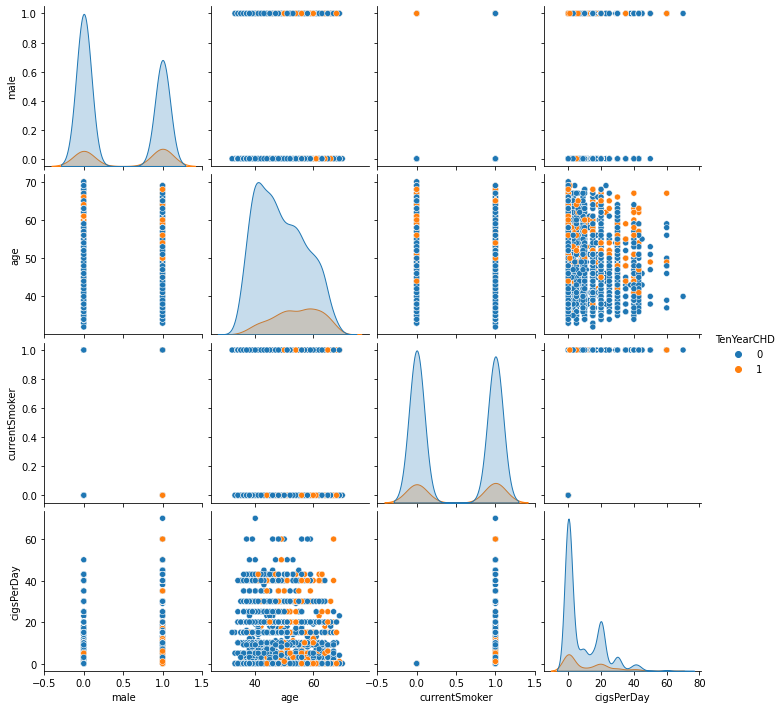

In [69]:
plt.figure(figsize = (25, 25))
sbn.pairplot(Data[["male", "age", "currentSmoker", "cigsPerDay", "TenYearCHD"]], hue = "TenYearCHD")
plt.show()

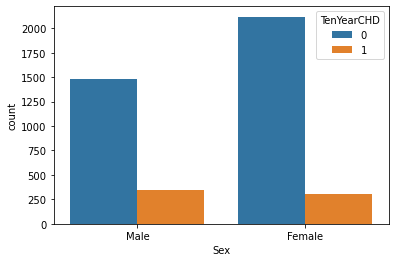

In [70]:
Datacopy=Data.copy()
Datacopy.rename(columns={'male': 'Sex'}, inplace = True)
Datacopy['Sex'] = Datacopy['Sex'].replace({0:'Female',1:'Male'})
sbn.countplot(x="Sex", hue="TenYearCHD", data=Datacopy)
plt.show()

${\color{darkblue}{\textbf{Heatmap 1}}}$

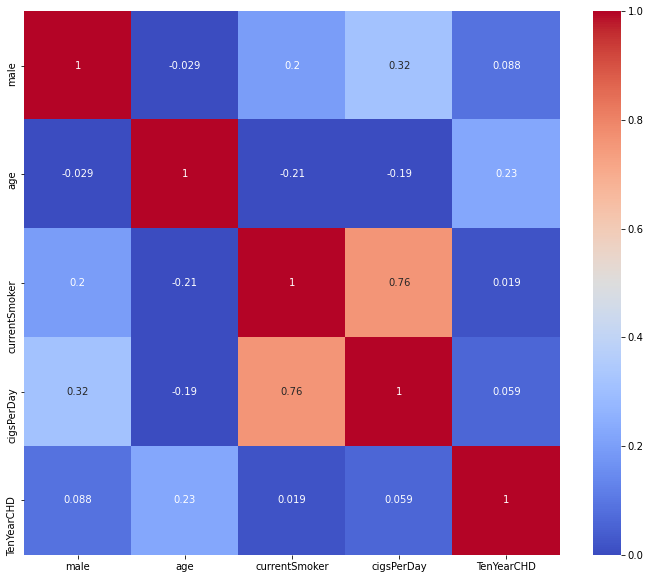

In [71]:
plt.figure(figsize = (12, 10))
sbn.heatmap(Data[["male", "age", "currentSmoker", "cigsPerDay", "TenYearCHD"]].corr(), vmin = 0, annot = True, cmap = "coolwarm")
plt.show()

${\color{darkred}{\textbf{Medium (.3 to .5) correlation+: cigsPerDay and male}}}$

${\color{darkred}{\textbf{Large (.5 to 1.0) correlation+: cigsPerDay and currentSmoker}}}$

${\color{darkblue}{\textbf{Heatmap 2}}}$

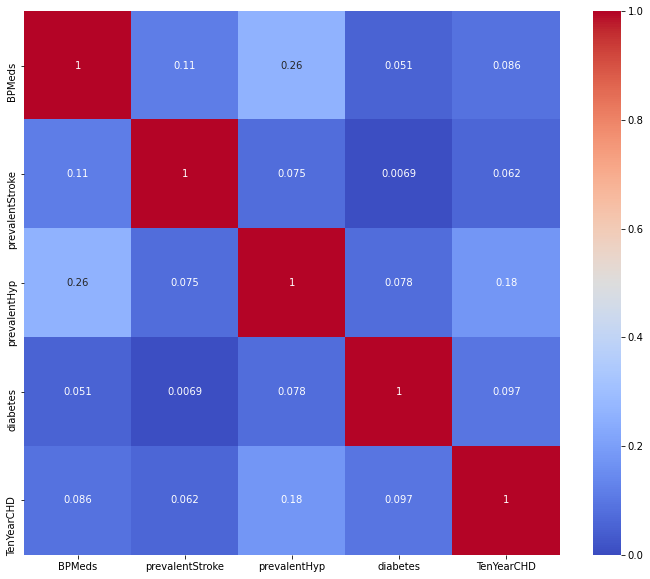

In [72]:
plt.figure(figsize = (12, 10))
sbn.heatmap(Data[["BPMeds", "prevalentStroke", "prevalentHyp", "diabetes", "TenYearCHD"]].corr(), vmin = 0, annot = True, cmap = "coolwarm")
plt.show()

<Figure size 1800x1800 with 0 Axes>

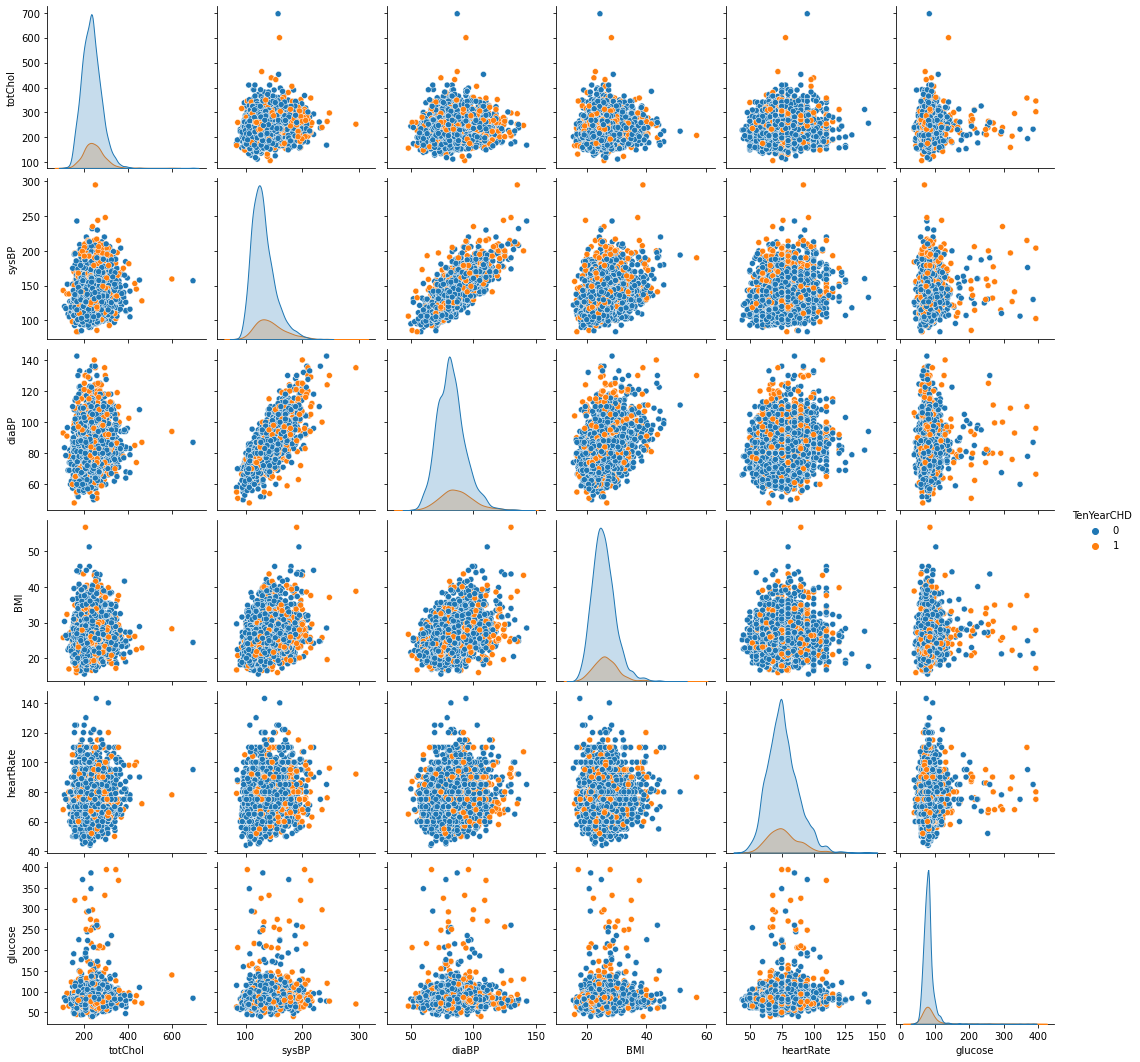

In [73]:
plt.figure(figsize = (25, 25))
sbn.pairplot(Data[["totChol", "sysBP", "diaBP", "BMI", "heartRate", "glucose", "TenYearCHD"]], hue = "TenYearCHD")
plt.show()

${\color{darkblue}{\textbf{Heatmap 3}}}$

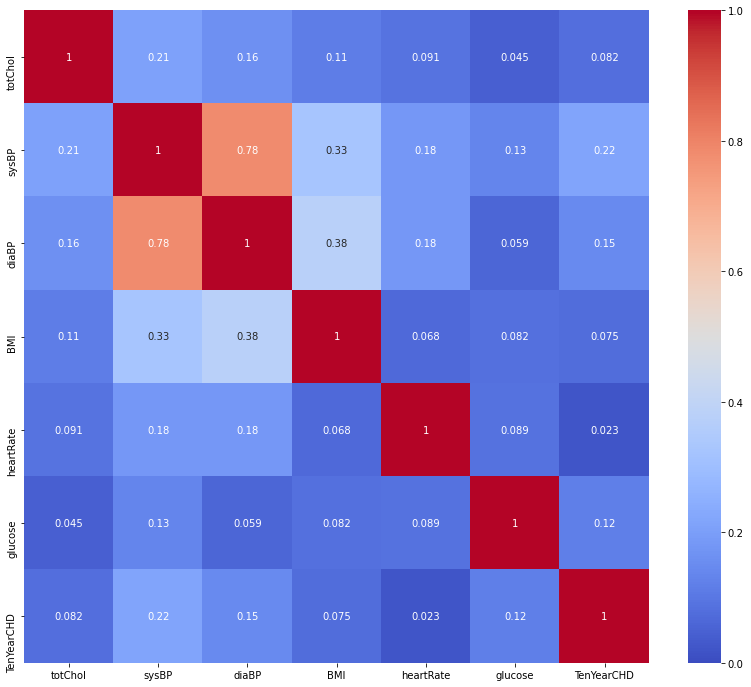

In [74]:
plt.figure(figsize = (14,12))
sbn.heatmap(Data[["totChol", "sysBP", "diaBP", "BMI", "heartRate", "glucose", "TenYearCHD"]].corr(), vmin = 0, annot = True, cmap = "coolwarm")
plt.show()

${\color{darkred}{\textbf{Medium (.3 to .5) correlation+: sysBP and BMI - diaBP and BMI}}}$

${\color{darkred}{\textbf{Large (.5 to 1.0) correlation+: sysBP and diaBP}}}$

${\color{darkblue}{\textbf{diaBP x sysBP}}}$

In [75]:
diaBP = np.array(Data["diaBP"], dtype = float)
sysBP = np.array(Data["sysBP"], dtype = float)
diaBP = diaBP.reshape(-1, 1)
ModeloLinearR = LinearRegression()
ModeloLinearR.fit(diaBP, sysBP)

LinearRegression()

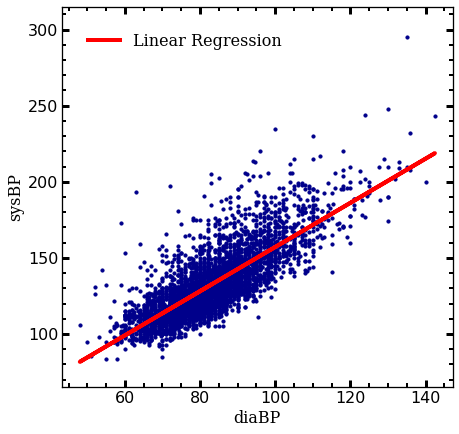

In [76]:
Font = {'family': 'serif', 'color': 'black', 'weight': 'normal', 'size': 16}
Font3 = FontProperties(family="serif", weight='normal', style='normal', size=16)
fig, ax = plt.subplots(figsize = (7,7))
ax.scatter(diaBP, sysBP, color = "darkblue", marker = ".", s = 40)
plt.plot(diaBP,diaBP*ModeloLinearR.coef_ + ModeloLinearR.intercept_, color = "red", label= 'Linear Regression', linewidth=4)
plt.xlabel("diaBP", fontdict = Font)
plt.ylabel("sysBP", fontdict = Font)
plt.ylim(65, 315)
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.tick_params(axis = "both", direction = "in", labelcolor='black', labelsize=16, top = True, right = True)
ax.tick_params(which='major', direction = "in", color='black', length=7, width = 3)
ax.tick_params(which='minor', direction = "in", length=4, color='black', width = 2, top = True, right = True)
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_color("black")
for axis in ["top", "bottom", "left", "right"]:
    ax.spines[axis].set_linewidth(1.3)
plt.legend(frameon = False, prop = Font3, bbox_to_anchor = (0.03,0.97), loc = "upper left")
plt.show()

# ${\color{darkred}{3.4.}}$ ${\color{darkblue}{\textbf{Data split}}}$ $\color{red}{✓}$

In [77]:
# feature and target variables
y = Data["TenYearCHD"] # target
# Create normalised data feature
norm = StandardScaler()
x = Data.drop(["TenYearCHD"], axis = 1)
x = norm.fit_transform(x)

In [78]:
# train - test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

# $\large{\color{darkred}{4.}}$ $\large{\color{darkblue}{\textbf{Logistic Regression}}}$ $\color{red}{✓}$

In [79]:
LogisticR = LogisticRegression(C = 0.1, penalty = "l2")

In [80]:
LogisticR.fit(x_train, y_train)

LogisticRegression(C=0.1)

${\color{darkblue}{\textbf{Prediction}}}$

In [81]:
y_pred = LogisticR.predict(x_test)

# ${\color{darkred}{4.1}}$ ${\color{darkblue}{\textbf{Confusion matrix}}}$ $\color{red}{✓}$

In [82]:
Matrix = confusion_matrix(y_test, y_pred) 
print(Matrix)

[[1036   12]
 [ 206   18]]


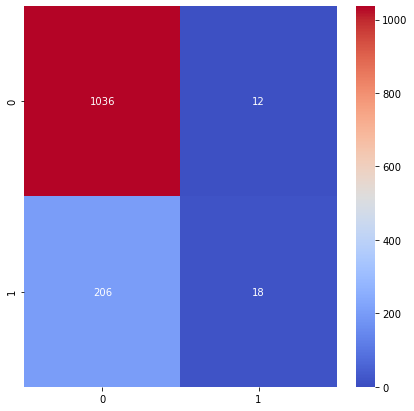

In [83]:
plt.figure(figsize = (7,7))
sbn.heatmap(Matrix, 
            annot = True, 
            cmap = "coolwarm",
            fmt = "g",
            vmin = 0)
plt.show()

In [84]:
print(f"Accuracy_score = {accuracy_score(y_test, y_pred):.3f}")
print(f"Recall_score = {recall_score(y_test, y_pred):.3f}")
print(f"Precision_score = {precision_score(y_test, y_pred):.3f}")

Accuracy_score = 0.829
Recall_score = 0.080
Precision_score = 0.600
